Accuracy: 0.8525
Precision: 0.4808
Recall: 0.2155
ROC AUC: 0.7843


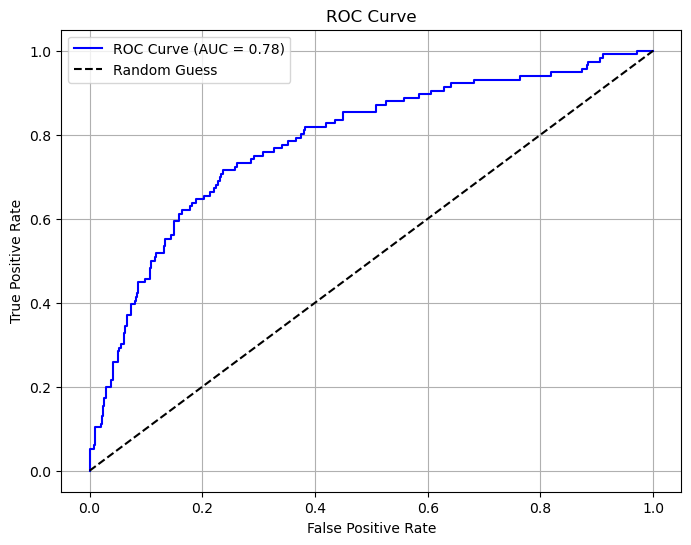

                        Feature  Coefficient  Odds Ratio
16  cat__International plan_Yes     2.242744        9.42
15  num__Customer service calls     0.731303        2.08
3        num__Total day minutes     0.352847        1.42
5         num__Total day charge     0.351419        1.42
14       num__Total intl charge     0.145149        1.16
12      num__Total intl minutes     0.140375        1.15
6        num__Total eve minutes     0.128558        1.14
8         num__Total eve charge     0.127369        1.14
9      num__Total night minutes     0.091295        1.10
11      num__Total night charge     0.096091        1.10
4          num__Total day calls     0.049770        1.05
0           num__Account length     0.029265        1.03
10       num__Total night calls     0.029582        1.03
2    num__Number vmail messages     0.013406        1.01
1                num__Area code    -0.035255        0.97
7          num__Total eve calls    -0.025395        0.97
13        num__Total intl calls

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


data = pd.read_csv('churn.csv')
data.head()
X = data.drop(columns=['Churn', 'State'])
y = data['Churn']

categorical_features = ['International plan', 'Voice mail plan']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)
y_pred_prob = model.predict_proba(X_test_preprocessed)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

coefficients = model.coef_[0]
feature_names = preprocessor.get_feature_names_out()

odds_ratios = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': [round(np.exp(coef), 2) for coef in coefficients]
})

print(odds_ratios.sort_values(by='Odds Ratio', ascending=False))
